# Import Libraries / Path / Data

In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
#create path
path = r'C:\Users\TypicalPancake\6.10 Gun Violence 12-2024'

In [6]:
#import dataframe
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_gv_cleaned.csv'))

In [7]:
#previewing
df.head()

,incident_id,Unnamed: 0.1,Unnamed: 0,date,state,city_or_county,address,n_killed,n_injured,incident_url,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,0,0,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,...,20.0,Adult 18+,Male,Julian Sims,Unknown,Arrested,Victim,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,-1.0,-1.0
1,460726,1,1,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,...,20.0,Adult 18+,Male,Bernard Gillis,Unknown,Killed,Victim,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2,2,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,...,25.0,Adult 18+,Male,Damien Bell,Unknown,"Injured, Unharmed, Arrested",Subject-Suspect,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,3,3,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,...,29.0,Adult 18+,Female,Stacie Philbrook,Unknown,Killed,Victim,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,4,4,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,...,18.0,Adult 18+,Female,Danielle Imani Jameison,Family,Injured,Victim,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [8]:
df.dtypes

incident_id                      int64
Unnamed: 0.1                     int64
Unnamed: 0                       int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
gun_type                        object
incident_characteristics        object
latitude                       float64
location_description            object
longitude                      float64
n_guns_involved                float64
notes                           object
participant_age                 object
participant_age_group           object
participant_gender              object
participant_name                object
participant_relationship 

# Cleaning Data / Preparation

In [10]:
#dropping non-relevant columns
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [11]:
df.dtypes

incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
gun_type                        object
incident_characteristics        object
latitude                       float64
location_description            object
longitude                      float64
n_guns_involved                float64
notes                           object
participant_age                 object
participant_age_group           object
participant_gender              object
participant_name                object
participant_relationship        object
participant_status              object
participant_type         

# Exploring 

In [13]:
#Create a correlation matrix using pandas
#Select only the numerical columns from the DataFrame to avoid errors
numerical_columns = df.select_dtypes(include=['int', 'float'])

#The index ('rank') is one of the numerical columns, so we will drop it

if 'rank' in numerical_columns.columns:
    numerical_columns = numerical_columns.drop(columns=['rank'])

#Now, we create the correlation matrix with the appropriate data
numerical_columns.corr()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
incident_id,1.000000,0.005052,0.009060,-0.056252,-0.102935,0.094336,0.199551,-0.044059,-0.048024
n_killed,0.005052,1.000000,-0.125425,0.042188,-0.092874,0.002522,-0.020856,-0.004116,-0.007123
n_injured,0.009060,-0.125425,1.000000,-0.005345,-0.005411,0.023156,-0.048715,-0.011589,-0.023839
congressional_district,-0.056252,0.042188,-0.005345,1.000000,-0.001131,-0.276527,0.003408,0.277791,0.364483
latitude,-0.102935,-0.092874,-0.005411,-0.001131,1.000000,-0.623859,-0.024970,-0.001690,0.135255
longitude,0.094336,0.002522,0.023156,-0.276527,-0.623859,1.000000,0.018805,-0.073327,-0.154105
n_guns_involved,0.199551,-0.020856,-0.048715,0.003408,-0.024970,0.018805,1.000000,-0.019885,-0.008743
state_house_district,-0.044059,-0.004116,-0.011589,0.277791,-0.001690,-0.073327,-0.019885,1.000000,0.514320
state_senate_district,-0.048024,-0.007123,-0.023839,0.364483,0.135255,-0.154105,-0.008743,0.514320,1.000000


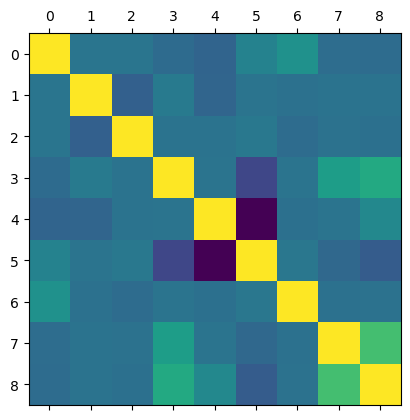

In [14]:
#Now, we use the above data to create a correlation heatmap using matplotlib

plt.matshow(numerical_columns.corr())
plt.show()

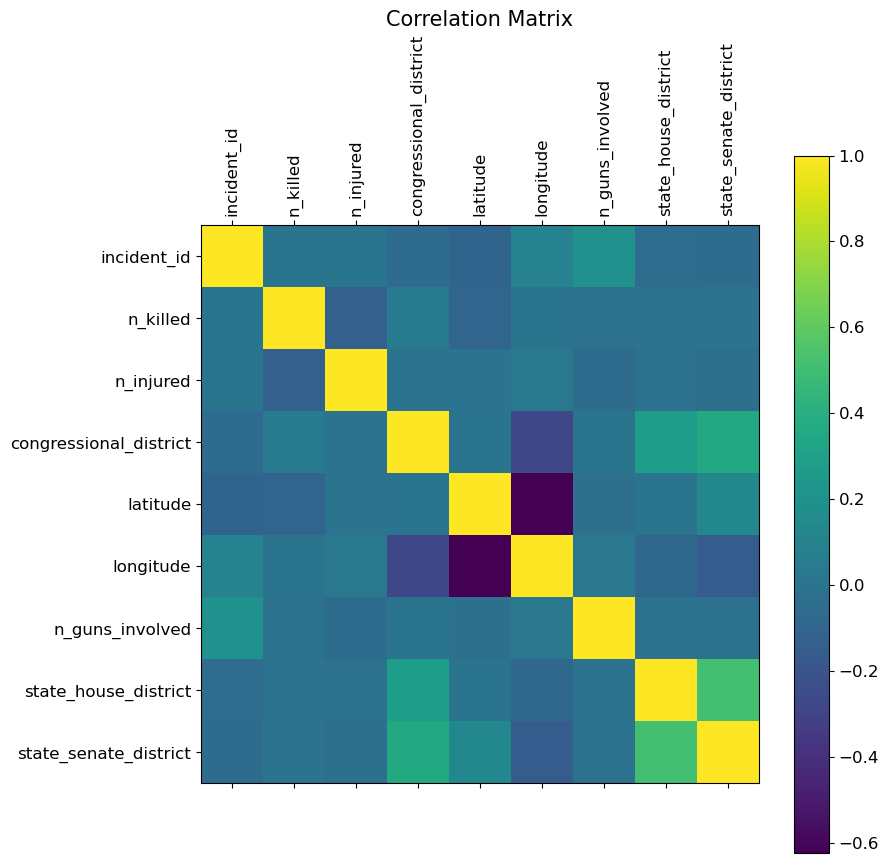

In [15]:
#Next, we add a legend, column labels, change the size of the heatmap and add a title
f=plt.figure(figsize=(9,9)) #This establishes the size of the heatmap
plt.matshow(numerical_columns.corr(), fignum=f.number) #Defines the type of plot
plt.xticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12, rotation=90)
plt.yticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12) #No need for rotation in y-axis
cb=plt.colorbar() #add a color legend (optimizes itseld based on colors used in heatmap)
cb.ax.tick_params(labelsize=12) #add font size
plt.title('Correlation Matrix', fontsize=15) #Creates titles

# Save the visualization to a file
plt.savefig('correlation_matrix_heatmap.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution
plt.show()  # Display the heatmap

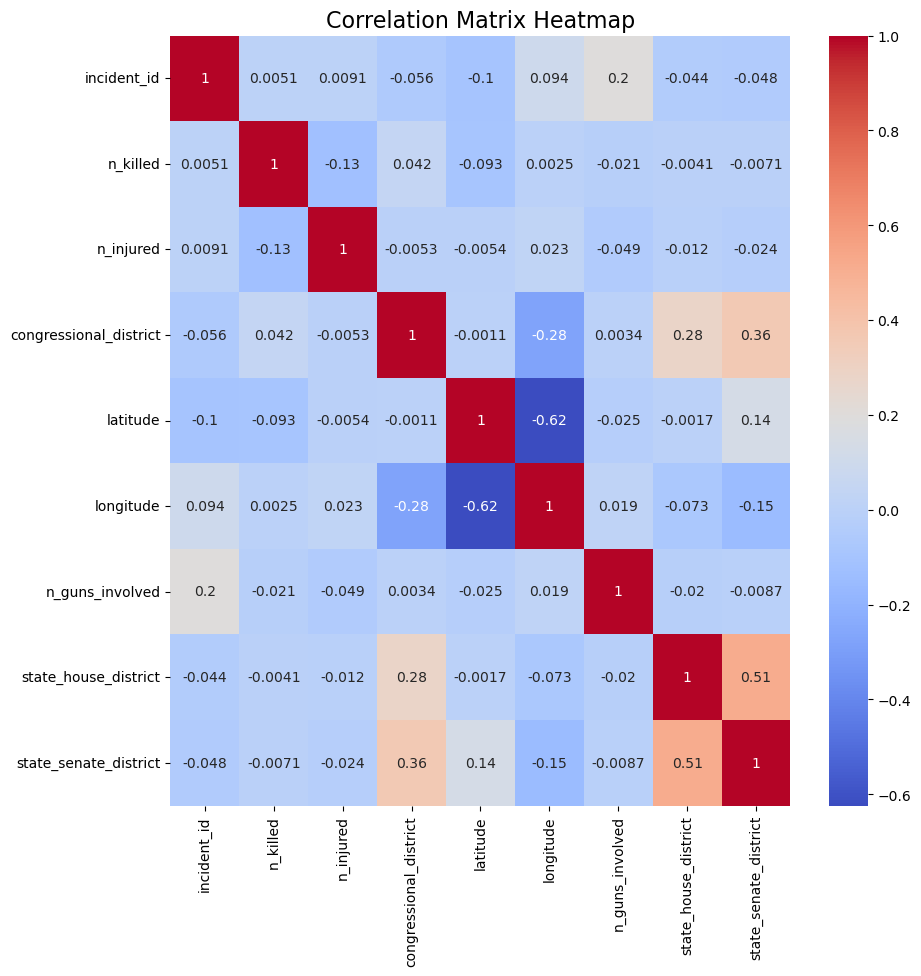

In [52]:
#Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(
    numerical_columns.corr(),
    annot=True,  # Add correlation coefficients to the heatmap
    ax=ax,
    cmap="coolwarm"  # You can customize the colormap if desired
)

# Add a title for the heatmap
ax.set_title('Correlation Matrix Heatmap', fontsize=16)

# Save the visualization to a file
plt.savefig('correlation_matrix_heatmap_seaborn.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()  # Display the heatmap

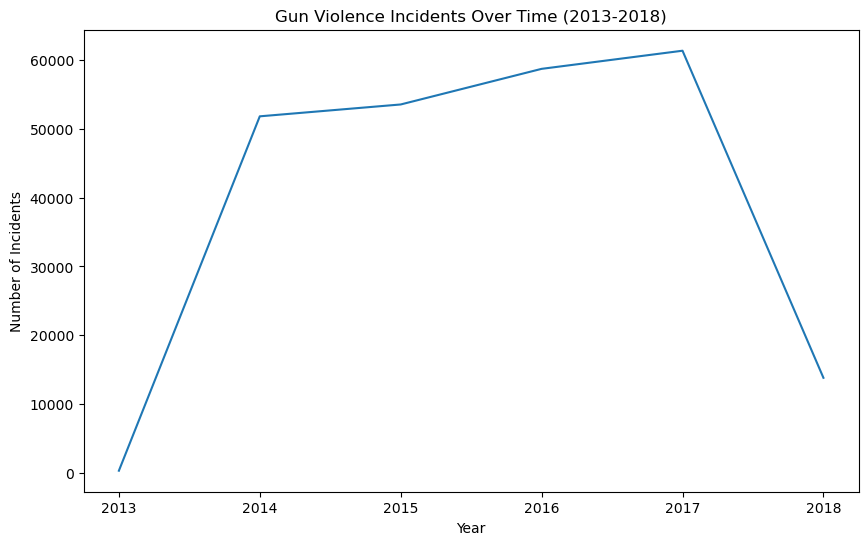

In [58]:
# Temporal Trend for gun violence incidents 2013 - 2018
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
incidents_by_year = df.groupby('year').size()
incidents_by_year.plot(
    kind='line',
    title='Gun Violence Incidents Over Time (2013-2018)',
    xlabel='Year',
    ylabel='Number of Incidents',
    figsize=(10, 6)  # Set the figure size
)

# Save the visualization to a file
plt.savefig('gun_violence_trend_2013_2018.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()  # Display the visualization

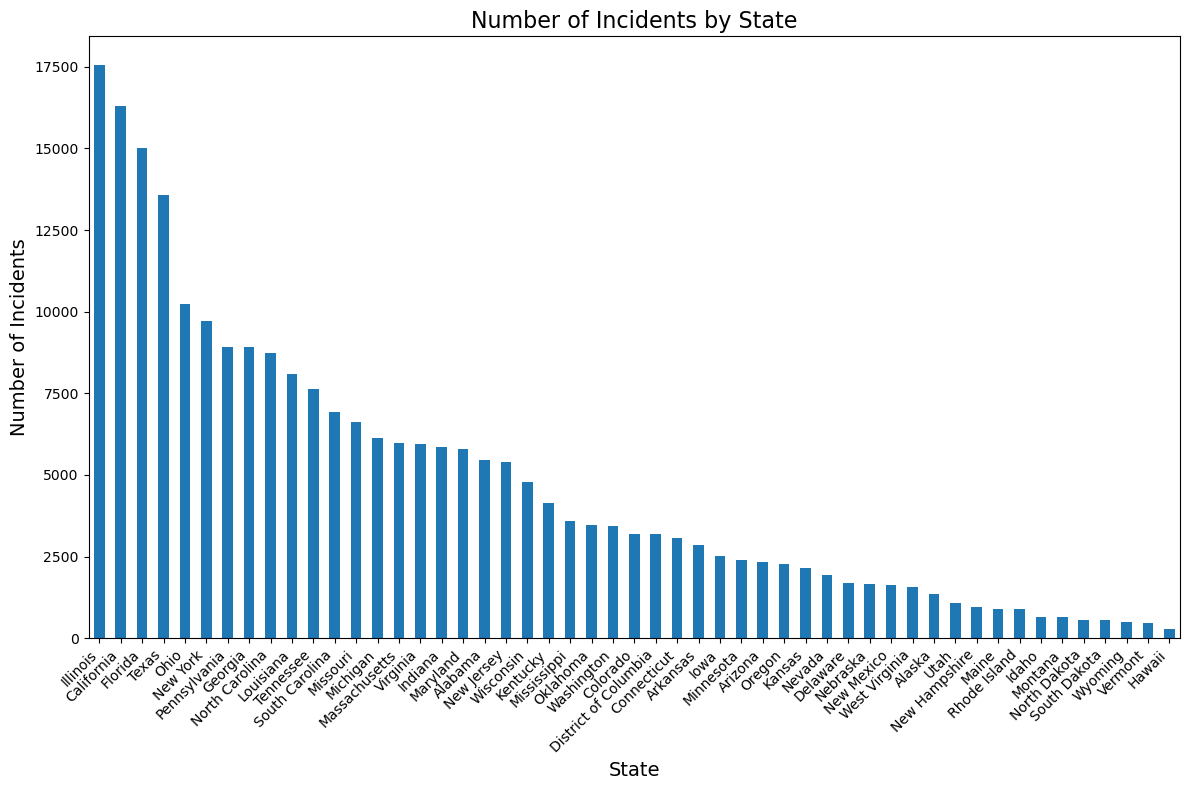

In [60]:
# sttates or cities that have the highest and lowest rates of gun violence
incidents_by_state = df['state'].value_counts()
plt.figure(figsize=(12, 8))
incidents_by_state.plot(kind='bar')
plt.title('Number of Incidents by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Save the visualization to a file
plt.savefig('incidents_by_state_bar_chart.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()  # Display the visualization

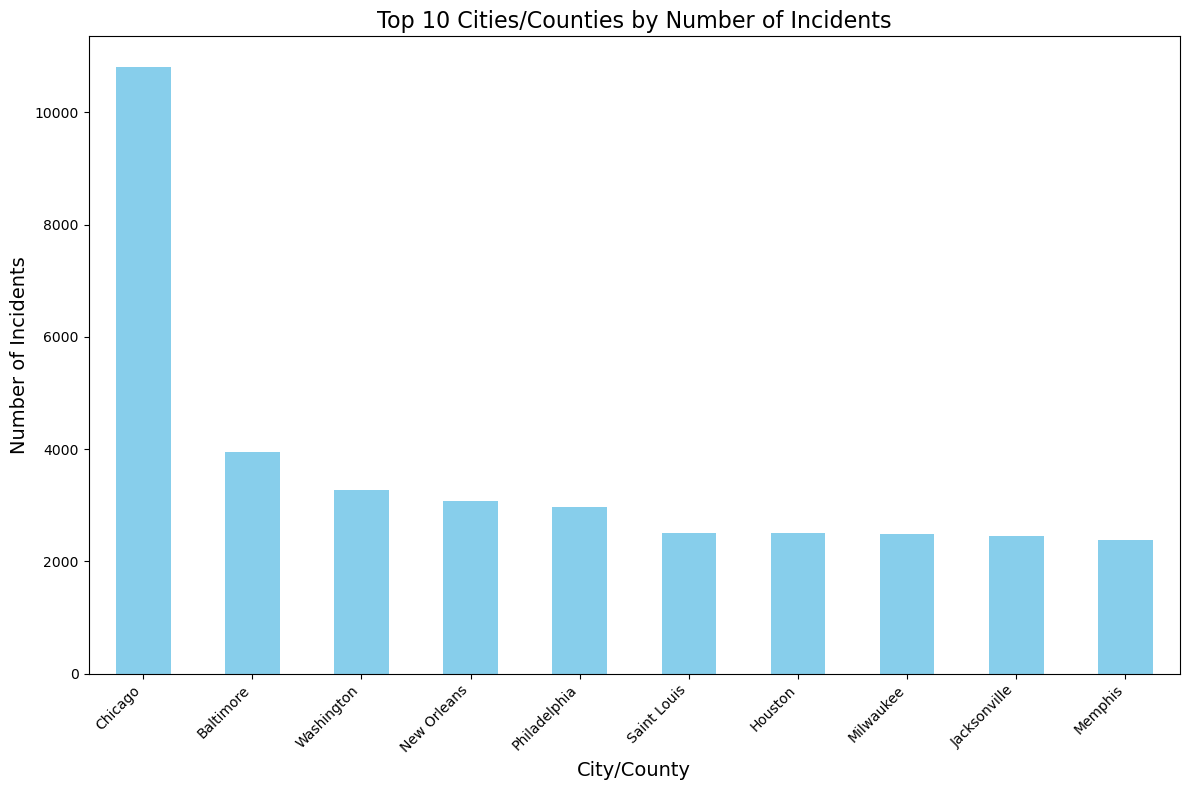

In [62]:
#Top 10 cities/counties by number of incidents
# Aggregating data for top 10 cities/counties with most incidents
incidents_by_city = df['city_or_county'].value_counts().head(10)

# Plotting top 10 cities/counties
plt.figure(figsize=(12, 8))
incidents_by_city.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities/Counties by Number of Incidents', fontsize=16)
plt.xlabel('City/County', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Save the visualization to a file
plt.savefig('top_10_cities_by_incidents.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()  # Display the visualization

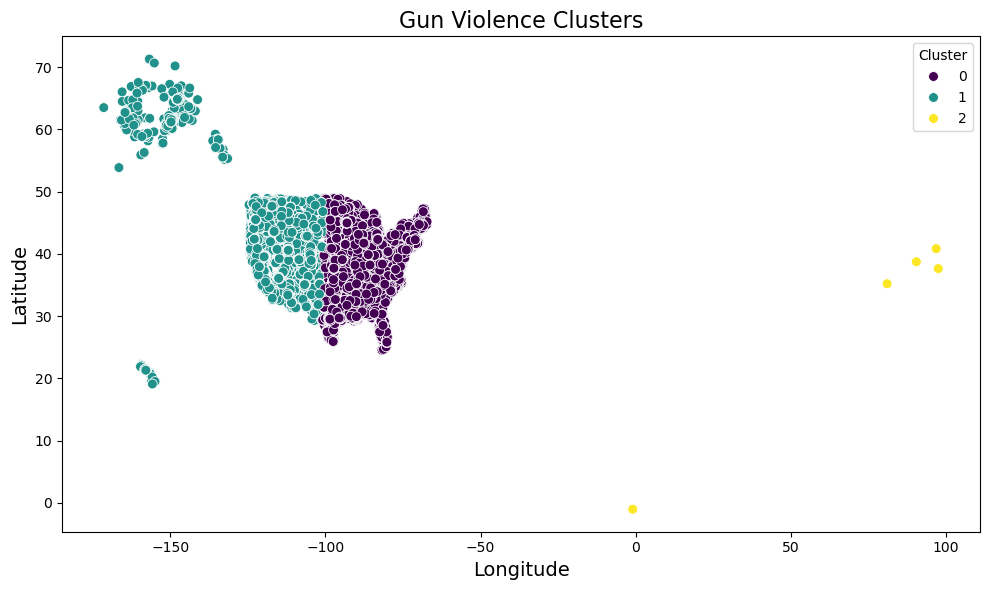

In [64]:
#cluster analysis for high incident frequency
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['latitude', 'longitude']])  # Fit and predict clusters

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    hue='cluster',
    palette='viridis',
    s=50  # Adjust marker size
)
plt.title('Gun Violence Clusters', fontsize=16)  # Add title
plt.xlabel('Longitude', fontsize=14)  # Add x-axis label
plt.ylabel('Latitude', fontsize=14)  # Add y-axis label
plt.legend(title='Cluster')  # Add legend title
plt.tight_layout()  # Adjust layout

# Save the visualization to a file
plt.savefig('gun_violence_clusters.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()  # Display the visualization

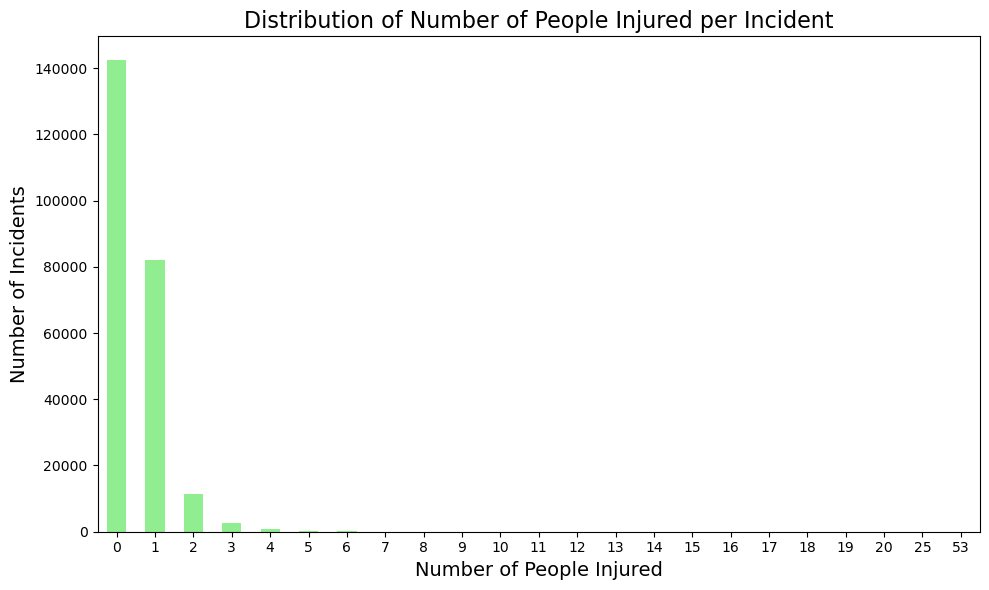

In [66]:
# Distribution of number of people injured
n_injured_distribution = df['n_injured'].value_counts().sort_index()

# Plotting the distribution
plt.figure(figsize=(10, 6))
n_injured_distribution.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Number of People Injured per Incident', fontsize=16)
plt.xlabel('Number of People Injured', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
# Save the visualization to a file
plt.savefig('distribution_injured_per_incident.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()  # Display the visualization

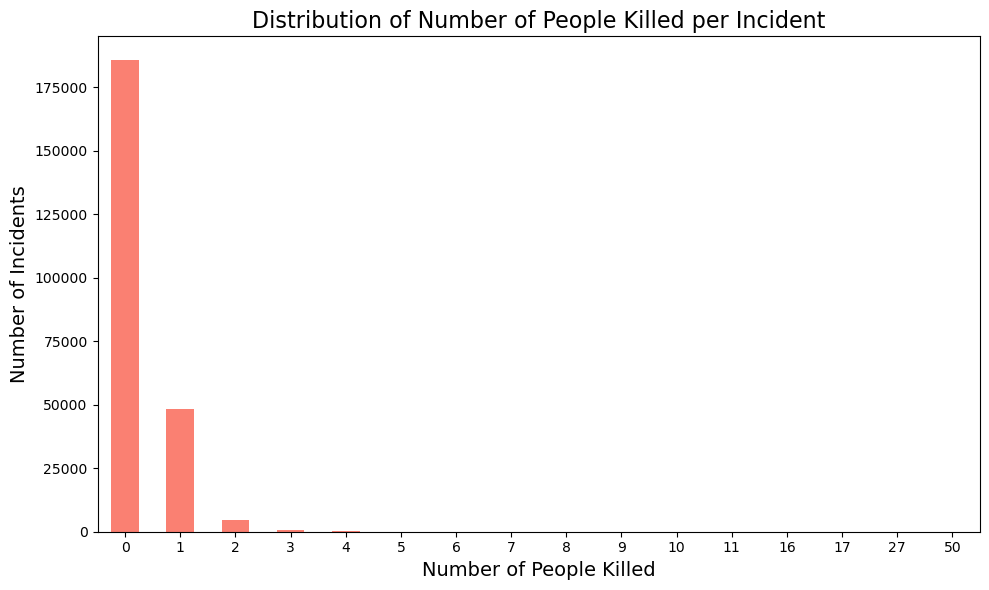

In [68]:
# Distribution of number of people killed in incidents
n_killed_distribution = df['n_killed'].value_counts().sort_index()

# Plotting the distribution
plt.figure(figsize=(10, 6))
n_killed_distribution.plot(kind='bar', color='salmon')
plt.title('Distribution of Number of People Killed per Incident', fontsize=16)
plt.xlabel('Number of People Killed', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
# Save the visualization to a file
plt.savefig('distribution_killed_per_incident.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()  # Display the visualization

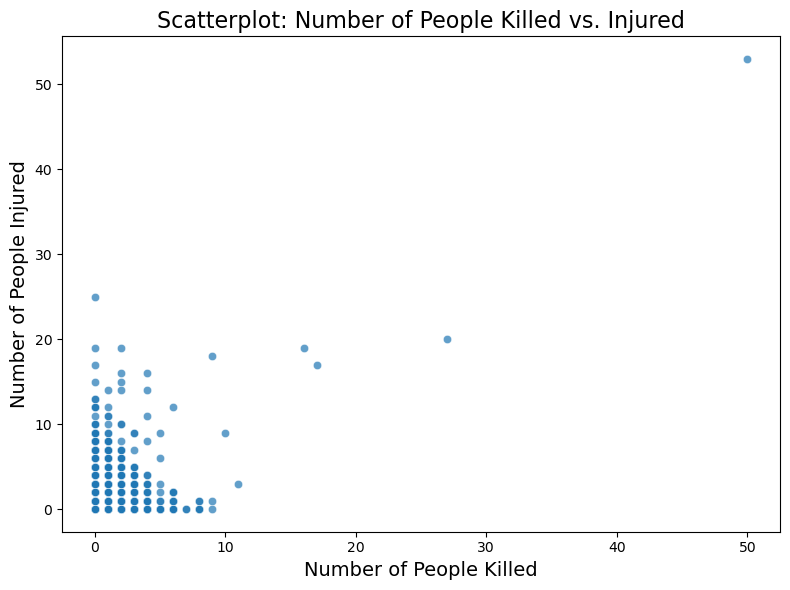

In [70]:
#scatterplot for people killed vs maimed people
plt.figure(figsize=(8, 6))  # Set figure size
sns.scatterplot(x='n_killed', y='n_injured', data=df, alpha=0.7)  # Add alpha for transparency
plt.title('Scatterplot: Number of People Killed vs. Injured', fontsize=16)  # Add title
plt.xlabel('Number of People Killed', fontsize=14)  # Add x-axis label
plt.ylabel('Number of People Injured', fontsize=14)  # Add y-axis label
plt.tight_layout()  # Adjust layout to prevent overlap

# Save the visualization to a file
plt.savefig('scatterplot_killed_vs_injured.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()  # Display the visualization

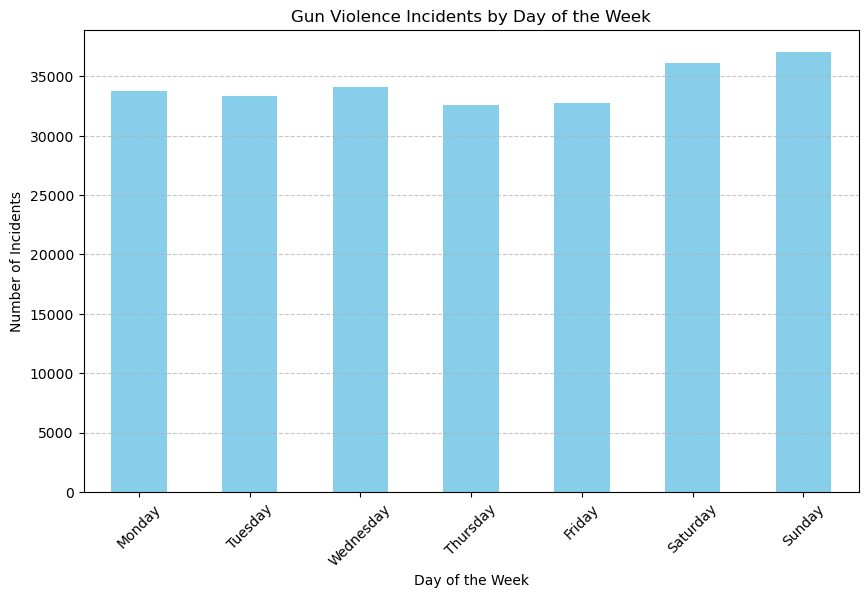

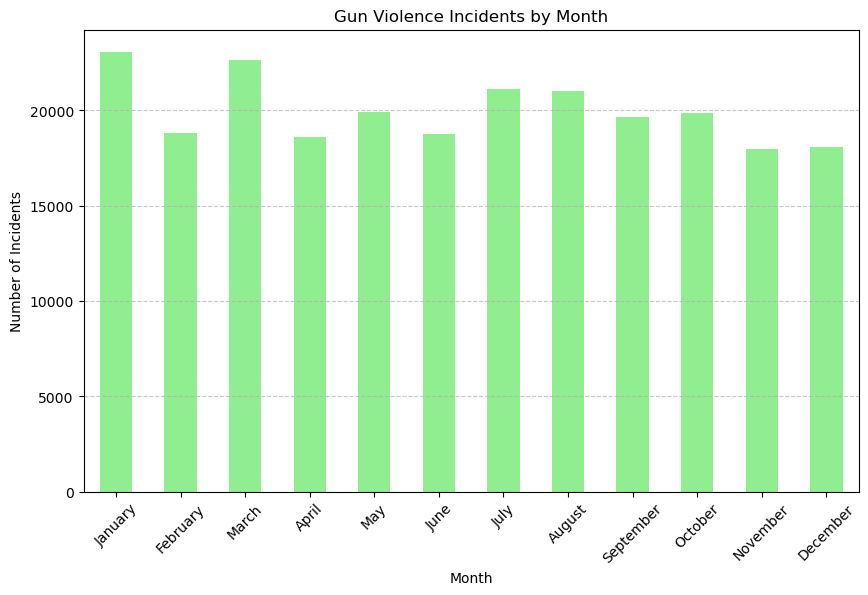

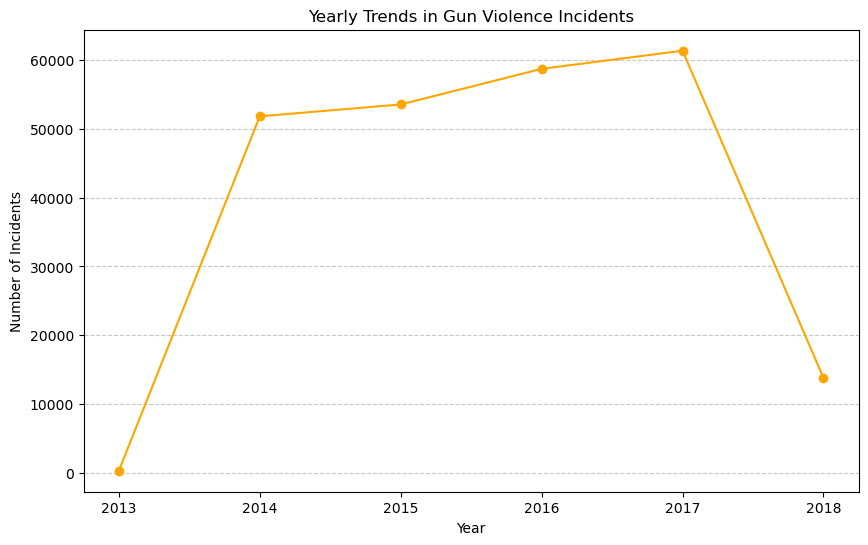

In [24]:
# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract day of the week and month
df['day_of_week'] = df['date'].dt.day_name()  # Monday, Tuesday, etc.
df['month'] = df['date'].dt.month_name()  # January, February, etc.

# Group by day of the week
day_of_week_counts = df['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Group by month
month_counts = df['month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plot incidents by day of the week
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar', color='skyblue')
plt.title('Gun Violence Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot incidents by month
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='lightgreen')
plt.title('Gun Violence Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Optional: Year-over-year trends
df['year'] = df['date'].dt.year
yearly_counts = df.groupby('year').size()

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line', marker='o', color='orange')
plt.title('Yearly Trends in Gun Violence Incidents')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


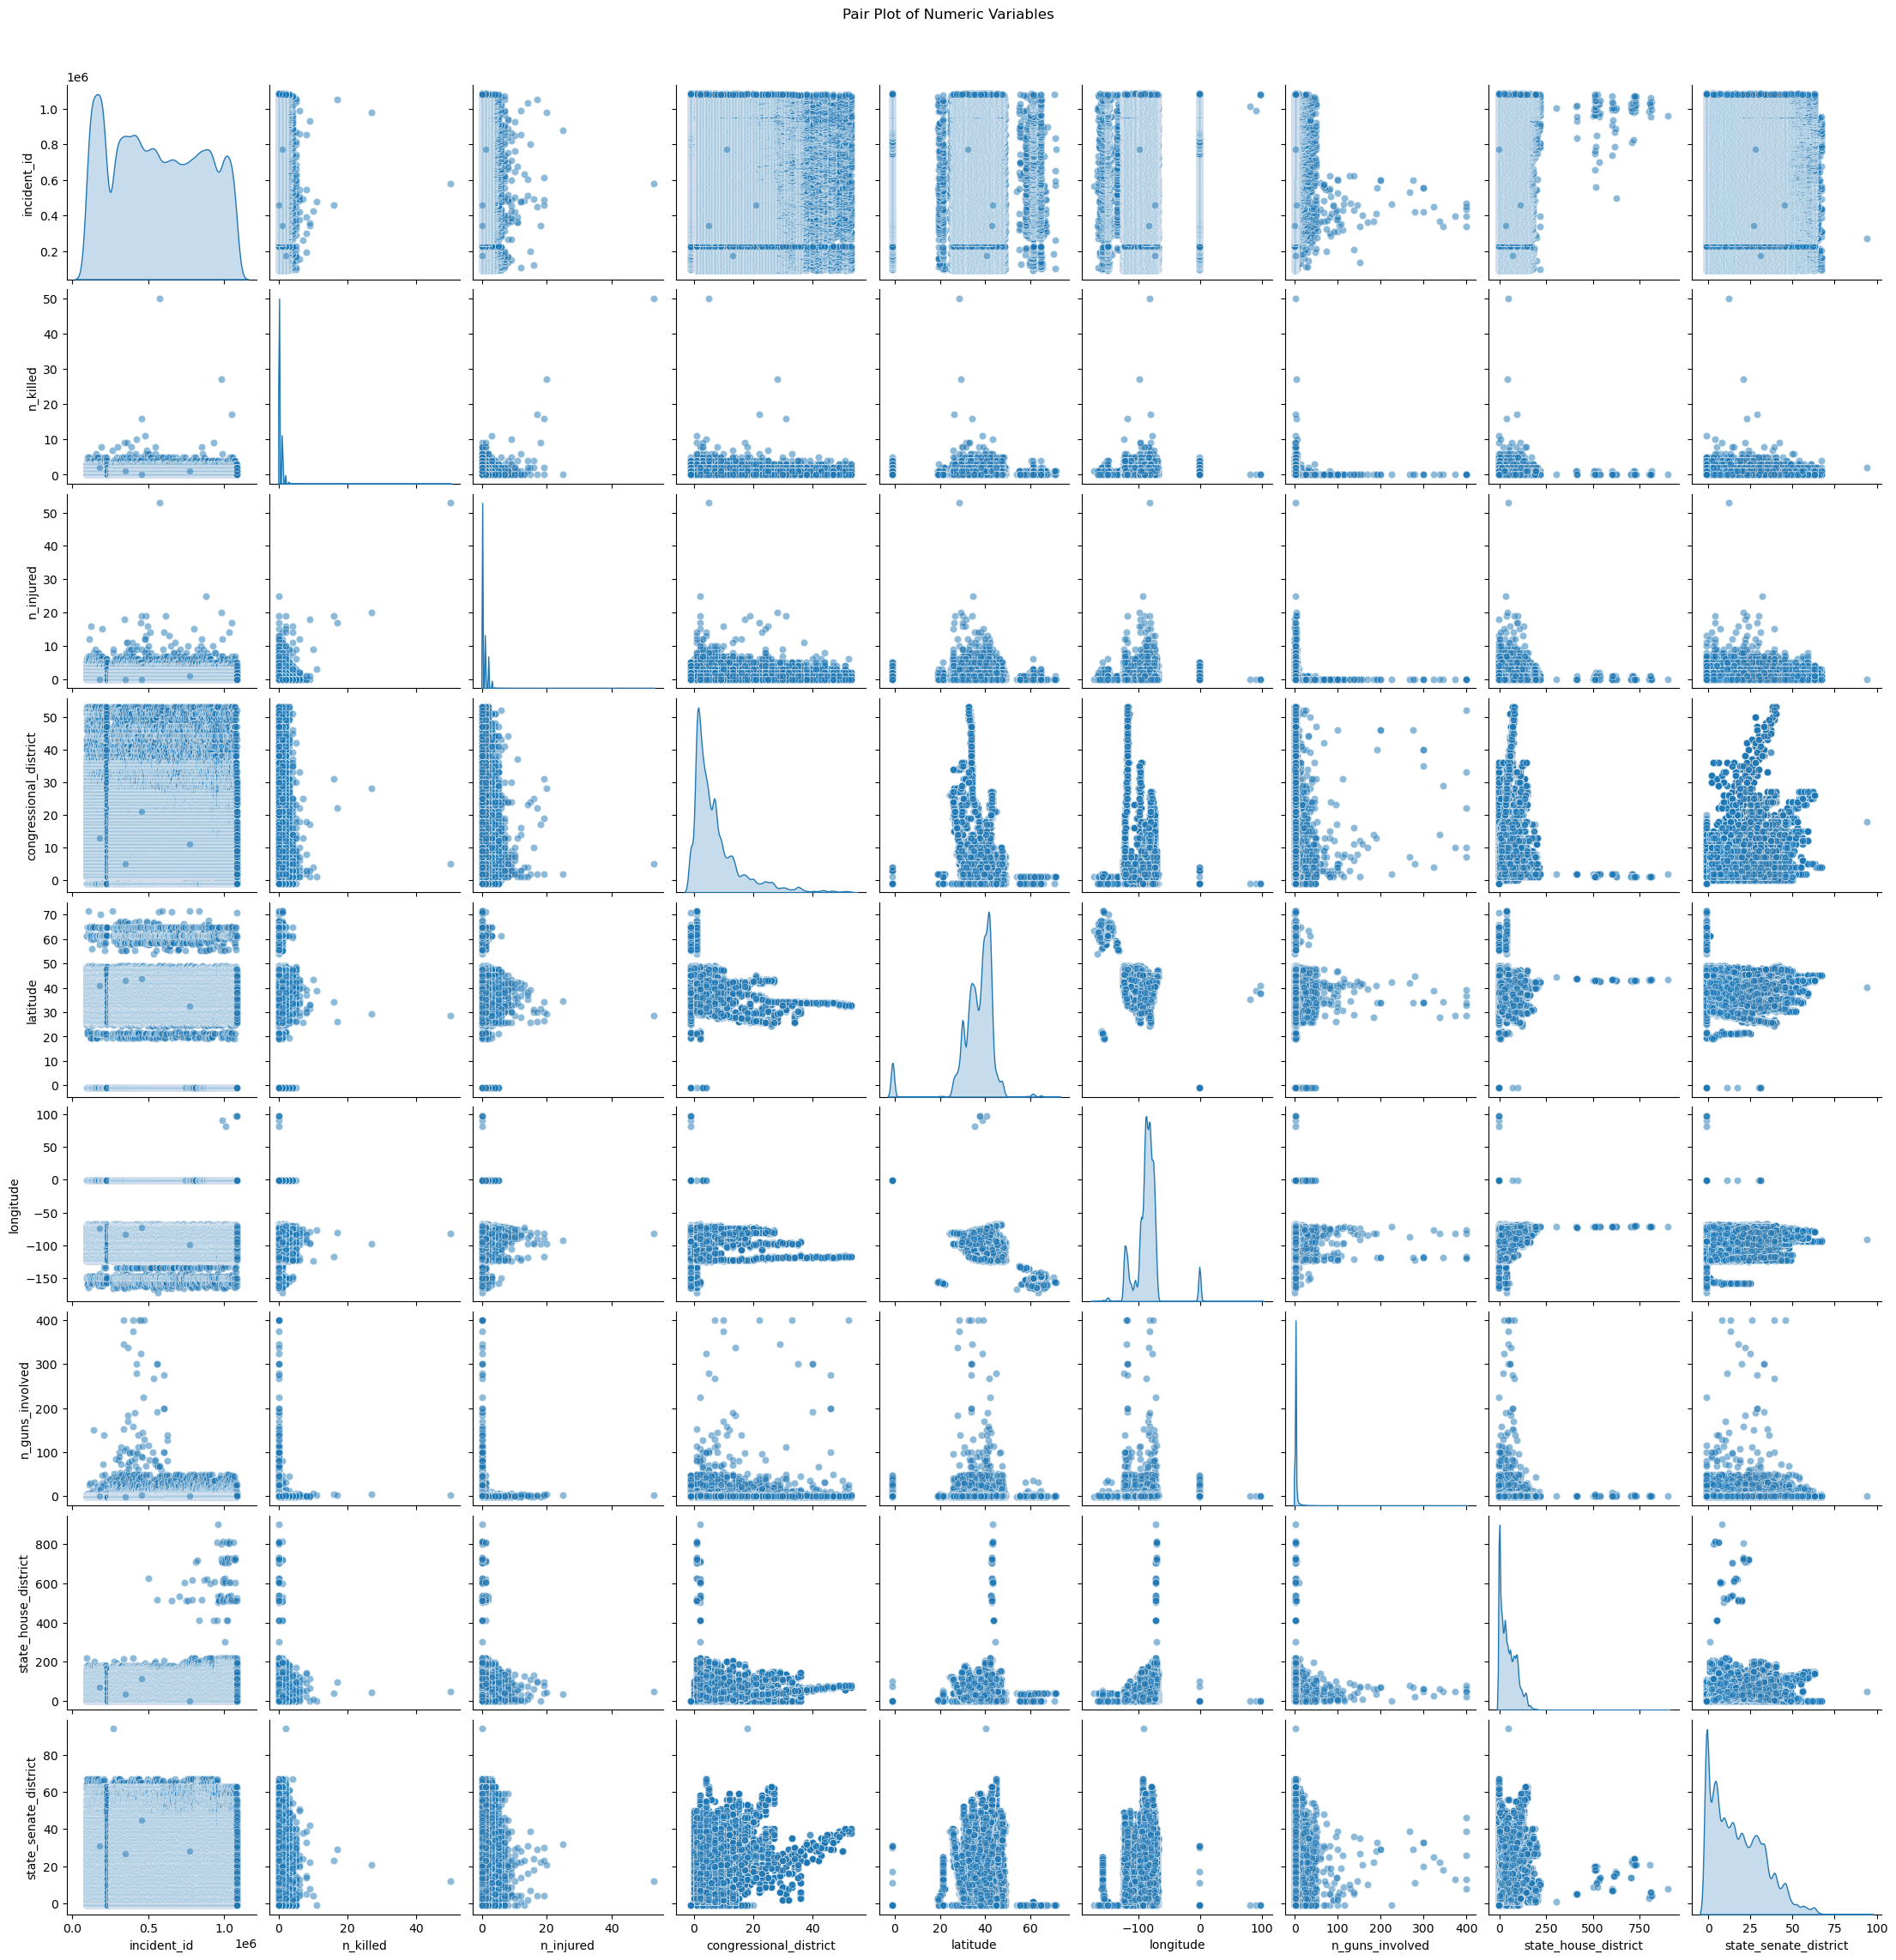

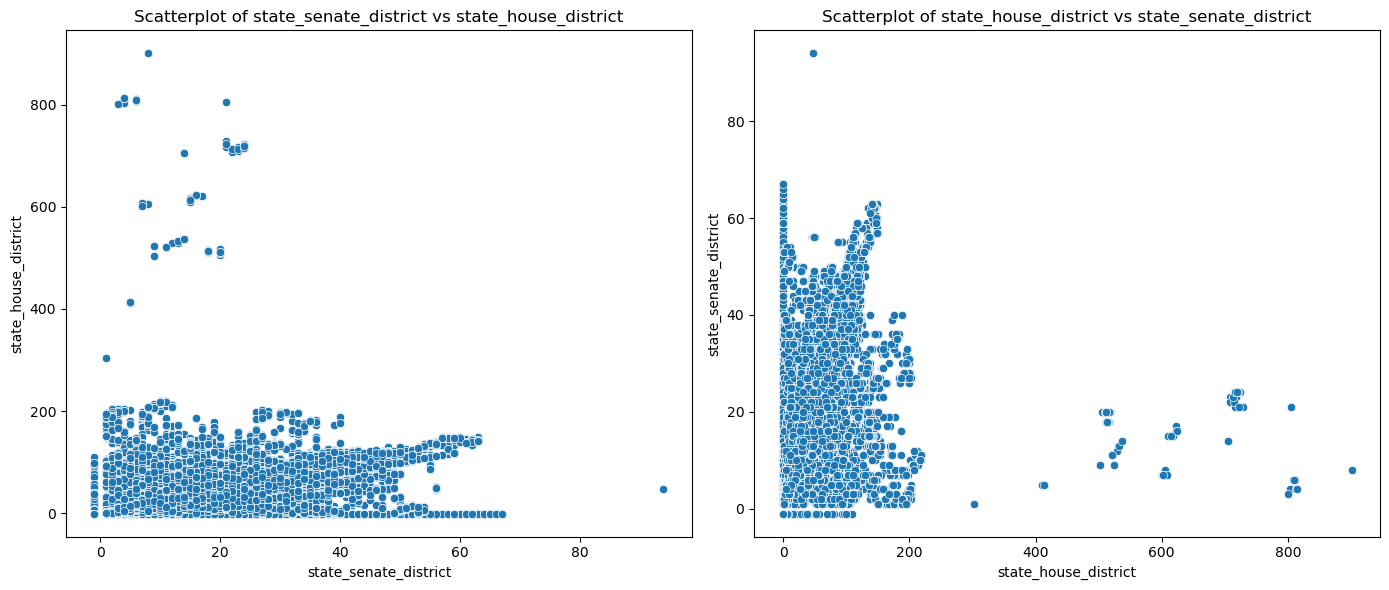

Strongest Correlations:
state_senate_district  state_house_district     0.51432
state_house_district   state_senate_district    0.51432
dtype: float64


In [25]:
# Select only numeric columns for the pair plot
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Create a pair plot of the entire dataset
sns.pairplot(numeric_columns, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Extract the strongest correlations (excluding self-correlations)
strongest_correlation = correlation_matrix.unstack().sort_values(ascending=False)
strongest_correlation = strongest_correlation[strongest_correlation < 1]  # Exclude self-correlation

# Select the top 2 pairs of variables with the strongest correlations
top_pairs = strongest_correlation.head(2).index

# Create scatterplots for the strongest correlations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for i, (x, y) in enumerate(top_pairs):
    sns.scatterplot(data=numeric_columns, x=x, y=y, ax=axes[i])
    axes[i].set_title(f'Scatterplot of {x} vs {y}')
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)

plt.tight_layout()
plt.show()

# Display the strongest correlations
print("Strongest Correlations:")
print(strongest_correlation.head(2))

# Explorying Hypotheses and Key Questions

# 1. Geographic Distribution of Incidents:
Hypothesis: States with larger populations (e.g., California, Texas, Florida) will report a higher number of incidents due to higher population density.
Analysis: Highest incidents per state are in Illinois, California, Florida, & Texas.

# 2. Correlation Between Fatalities and Injuries:
Hypothesis: Incidents with higher numbers of fatalities are likely to also have a higher number of injuries, suggesting high-severity events.
Analysis: Higher cases of kills show a correlation with the number of injured with the lower number having the highest amount of deaths and tapers off drastically when more are just injured.

# 3. Impact of Firearms Characteristics:
Hypothesis: Incidents involving stolen guns or specific gun types (e.g., assault rifles) are associated with higher severity (more fatalities/injuries).
Analysis: Will need to work with dataset to figure this out. (work in progress)

# 4. Temporal Patterns:
Hypothesis: Gun violence incidents exhibit temporal patterns, with more incidents occurring on weekends or specific months of the year.
Analysis:There is no obvious trend with this as finding shows fairly even throughout the week 
ries).
